In [1]:
#importing important libraries
from tabulate import tabulate
import matplotlib.pyplot as plt
from matplotlib import style
import time
import os

### 1. Implementing  methods to sort an array using `quicksort` and different sorting algorithms.

In [2]:
def quicksort(A, p, r):
    if p < r:
        q = partition(A, p, r)
        quicksort(A, p, q-1)
        quicksort(A, q+1, r)


def quicksort_using_median3(A, p, r):
    if p < r:
        N = r-p+1
        m = medianOf3(A, p, p+N//2, r)
        A[m], A[r] = A[r], A[m]
        q = partition(A, p, r)
        quicksort(A, p, q-1)
        quicksort(A, q+1, r)
        
        
def partition(A, p, r):
    x = A[r]
    i = p-1
    for j in range(p, r):
        if A[j] <= x:
            i += 1
            A[i], A[j] = A[j], A[i] #exchanging A[i] with A[j]
    A[i+1], A[r] = A[r], A[i+1] #exchanging A[i+1] with A[r]
    return i+1

def medianOf3(A, i, j, k):
    if A[i] < A[j]:
        return i if A[k] < A[i] else k if A[k] < A[j] else j
    else:
        return j if A[k] < A[j] else k if A[k] < A[i] else i
    
    
##############################################################

def mergesort(A, temp, p, r):
    if p < r:
        q = (p+r)//2
        mergesort(A, temp, p, q)
        mergesort(A, temp, q + 1, r)
        merge(A, temp, p, q, r)


def merge(A, temp, p, q, r):
    i = p
    j = q+1
    
    #copy A[p..r] to temp[p..r]
    for k in range(p, r+1):
        temp[k] = A[k]
    
    for k in range(p, r+1):
        if i > q:                  #left half empty, copy from the right
            A[k] = temp[j]
            j = j + 1
        elif j > r:                #right half empty, copy from the left
            A[k] = temp[i]
            i = i + 1
        elif temp[j] < temp[i]:    #copy from the right
            A[k] = temp[j]
            j = j + 1
        else:
            A[k] = temp[i]         #copy from the left
            i = i + 1

##############################################################

def insertion_sort(A, p, r):
    for i in range(p+1, r+1):
        curNum = A[i]
        j = i-1 
        while j >=p and curNum < A[j] : 
                A[j+1] = A[j] 
                j -= 1 
        A[j+1] = curNum
        
##############################################################

def heapsort(A):
    build_max_heap(A)
    for i in range(len(A) - 1, 0, -1):
        A[0], A[i] = A[i], A[0]
        max_heapify(A, index=0, size=i)
 
def build_max_heap(A):
    length = len(A)
    start = parent(length - 1)
    while start >= 0:
        max_heapify(A, index=start, size=length)
        start = start - 1


def parent(i):
    return (i - 1)//2
 
def left(i):
    return 2*i + 1
 
def right(i):
    return 2*i + 2
 
def max_heapify(A, index, size):
    l = left(index)
    r = right(index)
    if (l < size and A[l] > A[index]):
        largest = l
    else:
        largest = index
    if (r < size and A[r] > A[largest]):
        largest = r
    if (largest != index):
        A[largest], A[index] = A[index], A[largest]
        max_heapify(A, largest, size)

### Loading input test arrays

In [3]:
#Getting the input files ranging from 16 to 8192 that starts with "input"("i" smallcase)
def get_test_data():
    files = os.listdir()  #listing files from the current directory
    inputs = []
    for filename in files:
        if filename.startswith("input"):
            f = open(filename).read()
            elements = f.strip().split(' ') #getting array of elements separated by space in input file
            elements = [int(x) for x in elements] #changing elements type from string to integer
            inputs.append(elements)
        else:
            continue
        
    inputs.sort(key=len) #sorting inputs by input elements length
    return inputs

### 2. Writing  driver code to test the `quicksort` algorithm for the different input files

In [4]:
#Driver program to test the quicksort algorithm with the input files ranging from 16 to 8192

times_taken_by_quicksort = []
test_data_for_quicksort = get_test_data()
for data in test_data_for_quicksort:
    
    start_quicksort = time.time()
    quicksort(data, 0, len(data)-1)
    time_taken_quicksort = time.time() - start_quicksort
    
    times_taken_by_quicksort.append(round(time_taken_quicksort*1000, 2))
    
    print(f"Sorted Array of size:{len(data)} elements, time taken: {round(time_taken_quicksort*1000, 2)} ms")
    print(data) #printing sorted arrays

Sorted Array of size:16 elements, time taken: 0.0 ms
[2, 2, 3, 5, 7, 7, 8, 8, 8, 8, 9, 9, 9, 12, 14, 15]
Sorted Array of size:32 elements, time taken: 0.0 ms
[4, 6, 8, 9, 10, 11, 12, 12, 13, 14, 15, 15, 16, 16, 19, 20, 20, 21, 21, 21, 22, 23, 24, 25, 26, 26, 28, 29, 30, 30, 31, 31]
Sorted Array of size:64 elements, time taken: 0.0 ms
[0, 3, 4, 5, 7, 7, 8, 9, 9, 10, 11, 11, 13, 14, 14, 15, 15, 15, 17, 17, 20, 21, 24, 25, 28, 28, 30, 30, 30, 31, 31, 32, 32, 34, 35, 36, 36, 37, 38, 39, 40, 40, 41, 42, 43, 43, 44, 44, 45, 46, 46, 47, 48, 49, 51, 51, 51, 54, 54, 54, 58, 58, 59, 59]
Sorted Array of size:128 elements, time taken: 1.0 ms
[0, 0, 1, 1, 2, 2, 2, 2, 5, 5, 6, 7, 9, 10, 10, 12, 15, 16, 16, 18, 18, 20, 23, 24, 24, 25, 25, 31, 31, 32, 33, 33, 33, 34, 34, 35, 35, 36, 36, 36, 39, 39, 39, 41, 43, 43, 44, 45, 45, 46, 49, 50, 50, 51, 52, 52, 52, 53, 54, 54, 55, 58, 63, 65, 67, 67, 67, 71, 71, 72, 72, 73, 73, 76, 76, 76, 76, 79, 79, 81, 82, 82, 82, 82, 83, 85, 87, 88, 88, 88, 88, 88, 89, 89

### 3. Comparing the performance of the `quicksort` algorithm with 3 cases of input files: sorted, reversed sorted, and random.

Random Array: 2.05 ms
ReversedSorted Array: 78.35 ms
Sorted Array: 156.05 ms


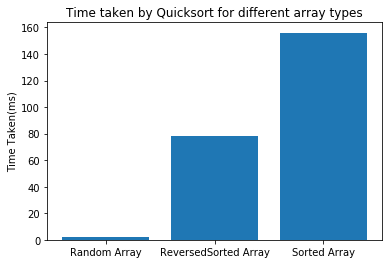

In [5]:
# Loading different array types test cases
files = os.listdir()  #listing files from the current directory
inputs = {}
for filename in files:
    if filename.startswith("Input"):
        input_case = f"{filename.split('.')[0].split('_')[1]} Array"
        f = open(filename).read()
        elements = f.strip().split(' ') #getting array of elements separated by space in input file
        elements = [int(x) for x in elements] #changing elements type from string to integer
        inputs[input_case] = elements
    else:
        continue

times_taken_by_quicksort_with_test_cases = {}
for test_case, test in inputs.items():
    
    start_quicksort = time.time()
    quicksort(test, 0, len(test)-1)
    time_taken_quicksort = time.time() - start_quicksort
    
    times_taken_by_quicksort_with_test_cases[test_case] = round(time_taken_quicksort*1000, 2)
    
    
x = times_taken_by_quicksort_with_test_cases.keys()
y = times_taken_by_quicksort_with_test_cases.values()

for i,j in zip(x, y):
    print(f"{i}: {j} ms")
    
plt.bar(list(x),list(y))
plt.ylabel("Time Taken(ms)")
plt.title("Time taken by Quicksort for different array types")
plt.show()

### 4. Writing driver code to test the `quicksort` algorithm using median of 3 partitioning

In [6]:
times_taken_by_quicksort_m3 = []
test_data_for_quicksort_m3 = get_test_data()
for data in test_data_for_quicksort_m3:
    
    start_quicksort_m3 = time.time()
    quicksort_using_median3(data, 0, len(data)-1)
    time_taken_quicksort_m3 = time.time() - start_quicksort_m3
    
    times_taken_by_quicksort_m3.append(round(time_taken_quicksort_m3*1000, 2))
    
    print(f"Sorted Array of size:{len(data)} elements, time taken: {round(time_taken_quicksort_m3*1000, 2)} ms")
    print(data) #printing sorted arrays

Sorted Array of size:16 elements, time taken: 0.0 ms
[2, 2, 3, 5, 7, 7, 8, 8, 8, 8, 9, 9, 9, 12, 14, 15]
Sorted Array of size:32 elements, time taken: 0.0 ms
[4, 6, 8, 9, 10, 11, 12, 12, 13, 14, 15, 15, 16, 16, 19, 20, 20, 21, 21, 21, 22, 23, 24, 25, 26, 26, 28, 29, 30, 30, 31, 31]
Sorted Array of size:64 elements, time taken: 0.0 ms
[0, 3, 4, 5, 7, 7, 8, 9, 9, 10, 11, 11, 13, 14, 14, 15, 15, 15, 17, 17, 20, 21, 24, 25, 28, 28, 30, 30, 30, 31, 31, 32, 32, 34, 35, 36, 36, 37, 38, 39, 40, 40, 41, 42, 43, 43, 44, 44, 45, 46, 46, 47, 48, 49, 51, 51, 51, 54, 54, 54, 58, 58, 59, 59]
Sorted Array of size:128 elements, time taken: 0.0 ms
[0, 0, 1, 1, 2, 2, 2, 2, 5, 5, 6, 7, 9, 10, 10, 12, 15, 16, 16, 18, 18, 20, 23, 24, 24, 25, 25, 31, 31, 32, 33, 33, 33, 34, 34, 35, 35, 36, 36, 36, 39, 39, 39, 41, 43, 43, 44, 45, 45, 46, 49, 50, 50, 51, 52, 52, 52, 53, 54, 54, 55, 58, 63, 65, 67, 67, 67, 71, 71, 72, 72, 73, 73, 76, 76, 76, 76, 79, 79, 81, 82, 82, 82, 82, 83, 85, 87, 88, 88, 88, 88, 88, 89, 89

### 5. Comparing the performance of the `quicksort using median of 3 partitioning` with the `basic quicksort` algorithm

  INPUT SIZE    BASIC QUICKSORT    QUICKSORT WITH M3
------------  -----------------  -------------------
          16               0                    0
          32               0                    0
          64               0                    0
         128               1                    0
         256               0                    1.05
         512               1.04                 1.93
        1024               2.95                 3.1
        2048               9.95                13.86
        4096              15.9                 17.93
        8192              53.81                72.1


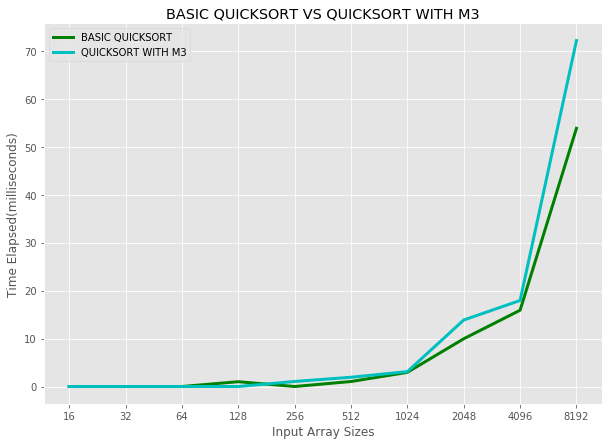

In [7]:
outputs = []
input_sizes = ['16', '32', '64', '128', '256', '512', '1024', '2048', '4096', '8192']
for i,j,k in zip(input_sizes,times_taken_by_quicksort,times_taken_by_quicksort_m3):
    output = []
    output.append(i)
    output.append(j)
    output.append(k)
    outputs.append(output)

print(tabulate(outputs, headers=['INPUT SIZE', 'BASIC QUICKSORT','QUICKSORT WITH M3']))


#ploting the time taken by basic quicksort and quicksort using median of 3 partioning
style.use('ggplot')
fig = plt.subplots(figsize=(10,7))
plt.plot(input_sizes,times_taken_by_quicksort,'g',label='BASIC QUICKSORT', linewidth=3)
plt.plot(input_sizes,times_taken_by_quicksort_m3,'c',label='QUICKSORT WITH M3',linewidth=3)
    
plt.title('BASIC QUICKSORT VS QUICKSORT WITH M3')
plt.ylabel('Time Elapsed(milliseconds)')
plt.xlabel('Input Array Sizes')
    
plt.legend()
plt.show()

### 6. Comparing the execution time of `quicksort` with the execution time of `insertion sort`, `mergesort`, `heapsort`

In [8]:
def time_taken(sorting_method):
    times_taken = []
    test_data  = get_test_data()
    for data in test_data: 
        if sorting_method == heapsort:
            start_time = time.time()
            sorting_method(data)
            time_taken = time.time() - start_time
        elif sorting_method == mergesort:
            temp = [0]*(len(data))
            start_time = time.time()
            sorting_method(data, temp, 0, len(data)-1)
            time_taken = time.time() - start_time
        else:
            start_time = time.time()
            sorting_method(data, 0, len(data)-1)
            time_taken = time.time() - start_time
    
        times_taken.append(round(time_taken*1000, 2))
    return times_taken

  INPUT SIZE    BASIC QUICKSORT    QUICKSORT WITH M3    INSERTIONSORT    MERGESORT    HEAPSORT
------------  -----------------  -------------------  ---------------  -----------  ----------
          16               0                    0                0            0           0
          32               0                    0.99             0            0           0
          64               0                    0                0            0           1
         128               0                    0                2            0.87        0
         256               1.07                 0.98             3.07         0           1.03
         512               0.92                 2.01            14.91         2.89        4.88
        1024               1.99                 3.94            63.83         5.29        8.11
        2048               5.98                14.96           290.41        11          25.26
        4096              16.98                22.02          

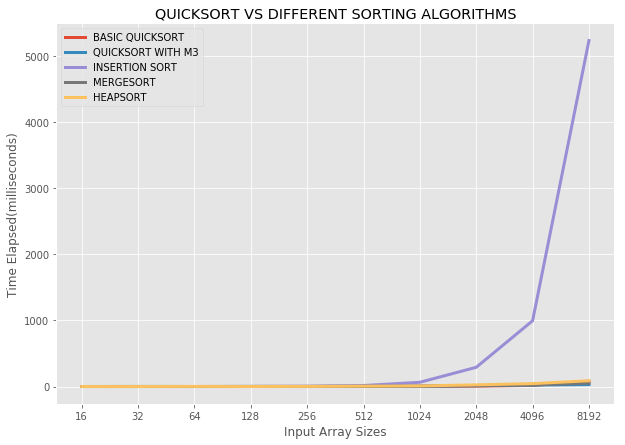

In [9]:
quicksort_time = time_taken(sorting_method=quicksort)
quicksort_m3_time = time_taken(sorting_method=quicksort_using_median3)
insertionsort_time = time_taken(sorting_method=insertion_sort)
mergesort_time = time_taken(sorting_method=mergesort)
heapsort_time = time_taken(sorting_method=heapsort)


input_sizes = ['16', '32', '64', '128', '256', '512', '1024', '2048', '4096', '8192']

outputs = []
for i,j,k,l,m,n in zip(input_sizes, quicksort_time, quicksort_m3_time, insertionsort_time, mergesort_time, heapsort_time):
    output = []
    output.append(i)
    output.append(j)
    output.append(k)
    output.append(l)
    output.append(m)
    output.append(n)
    outputs.append(output)

print(tabulate(outputs, headers=['INPUT SIZE', 'BASIC QUICKSORT','QUICKSORT WITH M3','INSERTIONSORT','MERGESORT','HEAPSORT']))


#ploting the time taken by quicksort and different sorting algorithms
style.use('ggplot')
fig = plt.subplots(figsize=(10,7))
plt.plot(input_sizes,quicksort_time,label='BASIC QUICKSORT', linewidth=3)
plt.plot(input_sizes,quicksort_m3_time,label='QUICKSORT WITH M3',linewidth=3)
plt.plot(input_sizes,insertionsort_time,label='INSERTION SORT',linewidth=3)
plt.plot(input_sizes,mergesort_time,label='MERGESORT',linewidth=3)
plt.plot(input_sizes,heapsort_time,label='HEAPSORT',linewidth=3)
    
plt.title('QUICKSORT VS DIFFERENT SORTING ALGORITHMS')
plt.ylabel('Time Elapsed(milliseconds)')
plt.xlabel('Input Array Sizes')
    
plt.legend()
plt.show()